# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [12]:
df = pd.read_csv("car_data.csv")

**Tasks, Part 1**

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
X = df[['Price']]
Y = df[['Mileage']]

In [ ]:
#1.Find the linear regression equation for mileage vs price.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [ ]:
r_i = regressor.intercept_
r_c = regressor.coef_

print('Linear Regression Equation: y = ',round(r_c[0][0],3),'* x +',round(r_i[0],3))

Linear Regression Equation: y =  -0.119 * x + 22363.542


Linear Regression Equation for mileage vs price is **y =  -0.119 * x + 22363.542**

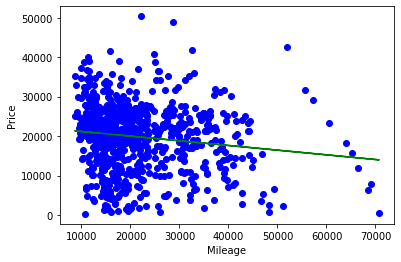

In [ ]:
#2.Chart the original data and the equation on the chart.
plt.scatter(X,Y,color='blue')
plt.plot(X,regressor.predict(X),color='green')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print('R2: ',regressor.score(X,Y))

R2:  0.020463447323489037


Here R2 score is **0.0204** which is lesser than 0.8 so the equation is not so good fit for data

**Tasks, Part 2**

In [ ]:
#1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation
X = df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
Y = df[['Price']]

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [ ]:
r_i = regressor.intercept_
r_c = regressor.coef_

print('Linear Regression Equation: y = ',r_c[0],'+',r_i[0])

Linear Regression Equation: y =  [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] + 6758.755143598106


The equation for columns ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with respect to Salary:

**[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] + 6758.755143598106** 

In [ ]:
#2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print('R2: ',regressor.score(X,Y))

R2:  0.4462643536728379


Here R2 score is **0.4462** which is lesser than 0.8 so the equation is not so good fit for data

In [14]:
#3.Find the combination of the factors that is the best predictor for price.
factors = ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

def lin_reg(factors, df, focus='Price'):
  input_cols = df[factors]
  focus_output = df[focus]
  regr_sd = linear_model.LinearRegression()
  regr_sd.fit(input_cols, focus_output)
  return regr_sd.score(input_cols, focus_output)

import itertools as it
def get_combos(cols):
  return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combos(factors)

def all_combo_scores(combos, df, focus='Price'):
  combo_scores = {}
  for m in range(len(list(combos))):
    for n in list(combos[m]):
      combo_scores[lin_reg(list(n), df, focus)] = n
  return combo_scores

combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.4462643536728379,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475594,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809262,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974421, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4244182401799875,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398465, ('Mileage', 'Cylinder', 'Liter', 'Cruise'

There is no combination that produces a strong relation

comparitively**(0.4462643536728379-('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'))** factors that is the best predictor for price.


**Tasks, Hard Mode**

In [5]:
#1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.
data = pd.read_csv("car_data.csv",usecols=['Price','Make','Model','Trim','Type'])

dummies = pd.get_dummies(data[['Make','Model','Trim','Type']])

merged = pd.concat([data,dummies],axis='columns')

final = merged.drop(['Make','Model','Trim','Type'],axis='columns')
final

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X = final.drop('Price',axis='columns')
Y = final[['Price']]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=200)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
print('R2 score: ',regressor.score(X,Y))

R2 score:  0.969112382403523


since R2 Score : **0.969112382403523** . The features Make, Model and type does fit in predicting the price

In [13]:
#2.Find the best combination of factors to predict price.
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [42]:
def combinations(Ft):
  if Ft:
    result = combinations(Ft[:-1])
    return result + [i+[Ft[-1]] for i in result]
  else:
    return [[]]
comb = combinations(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Make','Model','Trim','Type'])
comb = comb[1:]
print(comb)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
to_encode = ['Make','Model','Type','Trim']
R2_Score = []
for i in comb:
  X = df[i]
  y = df['Price'].values
  X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

  if 'Mileage' in X_train:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train_scaled,y_train)
  y_predict = regressor.predict(X_test_scaled)
  R2_Score.append(metrics.r2_score(y_test,y_predict))

In [45]:
df_snew = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
df_snew

,Feature Combination,R2 Score
0,[Mileage],0.039431
1,[Cylinder],0.039431
2,"[Mileage, Cylinder]",0.298457
3,[Liter],0.298457
4,"[Mileage, Liter]",0.309513
...,...,...
2042,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.991644
2043,"[Liter, Doors, Cruise, Sound, Leather, Make, M...",0.991644
2044,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.991542
2045,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.991542


In [46]:
df_snew['R2 Score'].max()

0.9921621787561907

In [50]:
df_snew['Feature Combination'][df_snew['R2 Score'].argmax()]

['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']

**'Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type'** are the best combination of the factors that is the best predictor for price.